In [ ]:
!git clone "https://github.com/Ankushdas178/bengali-abusive-comment-detection"

Cloning into 'bengali-abusive-comment-detection'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 18 (delta 6), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 31.91 KiB | 2.66 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer



# Load datasets
abusive_df = pd.read_csv('/content/bengali-abusive-comment-detection/Abusive_Merged_Classes-new.csv')
non_abusive_df = pd.read_csv('/content/bengali-abusive-comment-detection/Non_abusive - Sheet1.csv')

In [ ]:
# Standardize column names for consistency
abusive_df.columns = ['Comment', 'Class']
non_abusive_df.columns = ['Comment', 'Class']
# Combine datasets and replace NaN in non-abusive with "Non abusive"
# Ensure no missing values in the 'Class' column for the non-abusive dataset
non_abusive_df['Class'].fillna('Non abusive', inplace=True)

# Combine the datasets
merged_df = pd.concat([abusive_df, non_abusive_df], ignore_index=True)

<ipython-input-3-1535629c7e16>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  non_abusive_df['Class'].fillna('Non abusive', inplace=True)


In [ ]:
# Verify and ensure no missing values or unexpected classes
merged_df['Class'].fillna('Non abusive', inplace=True)  # Fill any remaining NaN values
assert merged_df['Class'].isna().sum() == 0, "There are still missing values in the 'Class' column."


<ipython-input-4-d72a2a8341b2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Class'].fillna('Non abusive', inplace=True)  # Fill any remaining NaN values


In [ ]:
# Verify and ensure no missing values or unexpected classes
merged_df['Class'] = merged_df['Class'].fillna('Non abusive')  # Fill any remaining NaN values
assert merged_df['Class'].isna().sum() == 0, "There are still missing values in the 'Class' column."


In [ ]:
# Check for unique classes
unique_classes = merged_df['Class'].unique()
print("Unique classes in the dataset:", unique_classes)

Unique classes in the dataset: ['Personal Hate' 'Gender abusive' 'Non abusive']


In [ ]:
# Save the merged dataset for further use
merged_df.to_csv('merged_dataset.csv', index=False)
# Display a sample of the merged dataset
print(merged_df.head())

                                             Comment           Class
0                                      Faltu kothakr   Personal Hate
1                                  Ota borbor khela,   Personal Hate
2  Ha...... ha....... ha..... ha....... Kicchu ba...   Personal Hate
3                                Kelani modon.......  Gender abusive
4  Ar mora jaba ocit akhono bacha aca kano pagol ...  Gender abusive


In [ ]:
# Preprocessing
def clean_text(text):
    # Ensure text is a string
    text = str(text)
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Lowercase the text
    text = text.lower()
    return text

# Apply the clean_text function
merged_df['Comment'] = merged_df['Comment'].apply(clean_text)

In [ ]:
# Encode labels dynamically based on unique classes in the dataset
label_encoder = LabelEncoder()
merged_df['Class'] = label_encoder.fit_transform(merged_df['Class'])
num_classes = len(label_encoder.classes_)


In [ ]:
# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(merged_df['Comment']).toarray()
y = merged_df['Class']

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence warning occurs
model.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [ ]:
y_test


,Class
31,0
832,1
413,2
1047,1
874,1
...,...
584,2
55,0
120,0
1006,1


In [ ]:
y_pred = model.predict(X_test)

# Ensure that target names are strings
target_names = [str(label) for label in label_encoder.classes_]
print(classification_report(y_test, y_pred, target_names=target_names))


                precision    recall  f1-score   support

Gender abusive       0.81      0.70      0.75        80
   Non abusive       0.63      0.74      0.68        62
 Personal Hate       0.62      0.62      0.62        71

      accuracy                           0.69       213
     macro avg       0.69      0.69      0.68       213
  weighted avg       0.69      0.69      0.69       213



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Overall Precision: {overall_precision:.2f}")
print(f"Overall Recall: {overall_recall:.2f}")
print(f"Overall F1 Score: {overall_f1:.2f}")

Overall Precision: 0.69
Overall Recall: 0.69
Overall F1 Score: 0.69


In [ ]:
#Same for all Machine Learning ALgorithms where TF-IDF Vectorizer is used

def classify_sentence_tfidf(input_sentence):
    # Preprocess the input sentence
    cleaned_sentence = clean_text(input_sentence)
    tfidf_sequence = vectorizer.transform([cleaned_sentence]).toarray()  # Ensure 2D array

    # Predict the class
    prediction = model.predict(tfidf_sequence)  # No need for axis handling
    predicted_class_index = np.argmax(prediction)  # Get the class index

    # Decode the predicted class
    predicted_class_label = label_encoder.inverse_transform([predicted_class_index])[0]

    # Return the prediction
    return predicted_class_label

# Example usage
input_sentence = "Jali sorkar jali kaj tik ache vote dei ekon somolchona manuser sikha hok "
predicted_class = classify_sentence_tfidf(input_sentence)
print(f"Input Sentence: {input_sentence}")
print(f"Predicted Class: {predicted_class}")

Input Sentence: Jali sorkar jali kaj tik ache vote dei ekon somolchona manuser sikha hok 
Predicted Class: Gender abusive


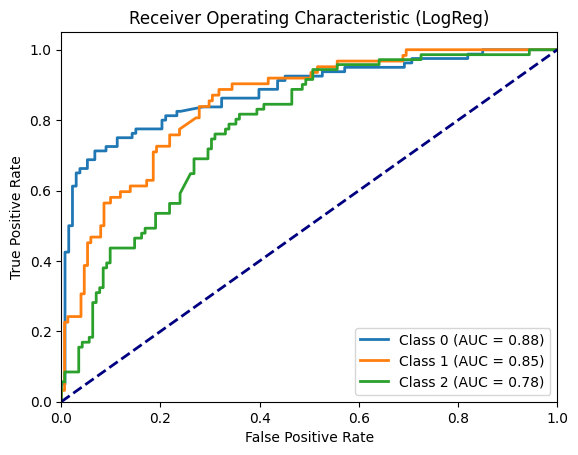

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Replace with your classes
n_classes = y_test_binarized.shape[1]

# Train One-vs-Rest Classifier
y_probs = model.predict_proba(X_test)  # Assumes model supports `predict_proba`

# Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (LogReg)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
print(y_pred.shape)

(213,)


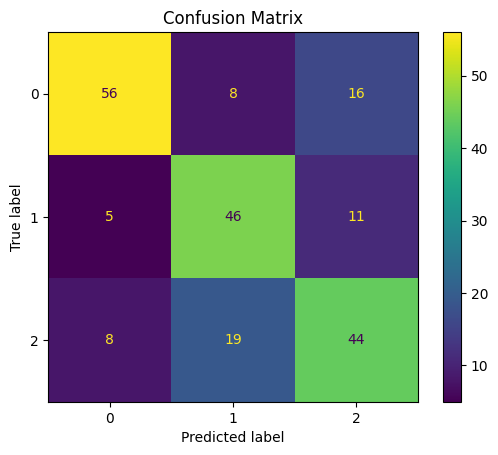

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you already have 'y_true' and 'y_pred' defined
# In this case, y_pred is already a 1D array of predicted class labels
y_pred_classes = y_pred  # Directly use y_pred as it is already class labels
y_true_classes = y_test  # Ensure y_test is also a 1D array of true class labels

# Generate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()
